In [130]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from pprint import pprint as pp
import math

In [131]:
data = pkl.load( open("/scratch/yl1363/lanmt-ebm/analysis/data_8p_8_16.pkl", "rb") )

In [132]:
keylist = list(data.keys())
print (keylist)

[1, 8, 13, 29, 43, 45, 52, 54, 58, 72, 74, 77, 78, 81, 90, 95, 108, 125, 129, 130, 138, 145, 152, 154, 156, 157, 162, 164, 174, 177, 178, 180, 183, 184, 188, 208, 213, 232, 250, 255, 264, 265, 267, 269, 274, 277, 278, 279, 280, 284, 286, 287, 288, 289, 297, 300, 301, 304, 306, 308, 317, 332, 335, 337, 342, 354, 355, 357, 358, 360, 363, 364, 374, 390, 392, 410, 413, 415, 423, 424, 426, 430, 437, 443, 452, 457, 460, 462, 463, 465, 472, 473, 482, 494, 505, 507, 508, 514, 517, 520, 525, 528, 529, 530, 533, 534, 535, 536, 538, 540, 543, 546, 547, 550, 552, 559, 562, 563, 564, 565, 566, 570, 579, 580, 590, 597, 609, 614, 616, 617, 626, 631, 647, 649, 659, 660, 662, 670, 672, 673, 674, 677, 680, 684, 689, 693, 707, 722, 729, 734, 747, 763, 764, 765, 768, 779, 794, 795, 803, 805, 808, 826, 828, 830, 834, 839, 843, 846, 850, 860, 863, 867, 874, 886, 893, 907, 908, 909, 914, 929, 935, 936, 937, 939, 945, 951, 952, 960, 972, 983, 989, 991, 997, 999, 1000, 1004, 1008, 1010, 1016, 1026, 1027, 1029,

In [133]:
for key in keylist:
    src_line = data[key]["src_line"]
    trg_line = data[key]["trg_line"]
    delta_zs = data[key]["delta_zs"]
    delta_ys = data[key]["delta_ys"]
    sgd_y = data[key]["sgd_y"]
    all_grads = data[key]["all_grads"]
    if len( set([" ".join(delta_ys[0]), " ".join(delta_ys[-1]), " ".join(sgd_y)]) ) < 3:
        continue
    print (key)
    print ("SRC\t", src_line.strip())
    print ("TRG\t", trg_line.strip())
    print ("MEAN\t", " ".join(delta_ys[0]))
    print ("DELTA\t", " ".join(delta_ys[-1]))
    print ("SGD\t", " ".join(sgd_y))
    print ()

29
SRC	 ▁Das ▁führt ▁zu ▁Gebäuden ▁wie ▁diesen .
TRG	 ▁That ' s ▁how ▁we ▁end ▁up ▁with ▁buildings ▁like ▁this .
MEAN	 <s> ▁That ' s ▁going ▁to ▁buildings ▁you ▁like ▁like ▁like ▁this . </s>
DELTA	 <s> ▁That ' s ▁going ▁to ▁buildings ▁like ▁like ▁like ▁like ▁this . </s>
SGD	 <s> ▁That ' s ▁leads ▁to ▁buildings ▁like ▁buildings ▁like ▁like ▁this . </s>

90
SRC	 ▁Deshalb ▁haben ▁wir ▁solche ▁Gebäude .
TRG	 ▁That ' s ▁how ▁we ▁end ▁up ▁with ▁buildings ▁like ▁this .
MEAN	 <s> ▁And ▁so ' ' ▁got ▁to ▁have ▁these ▁buildings ▁like ▁this . </s>
DELTA	 <s> ▁And ▁that ' s ▁why ▁we ▁have ▁these ▁buildings ▁like ▁this . </s>
SGD	 <s> ▁So ▁we ' s ▁why ▁we ▁have ▁these ▁buildings ▁like ▁this . </s>

130
SRC	 ▁Sie ▁wurde ▁grad ▁1 ▁Jahr ▁und ▁hat ▁begonnen ▁zu ▁laufen .
TRG	 ▁She ' s ▁just ▁turned ▁one ▁and ▁started ▁to ▁walk .
MEAN	 <s> ▁It ▁was ▁grad ▁one ▁year , ▁she ▁started ▁to ▁walk . </s>
DELTA	 <s> ▁It ▁was ▁grad ▁a ▁year ▁and ▁she ▁started ▁to ▁walk . </s>
SGD	 <s> ▁It ▁was ▁grad ▁a ▁year , ▁a

In [137]:
keys =  [722, 803, 914, 945, 952, 1384] 
key = 945
src_line = data[key]["src_line"]
trg_line = data[key]["trg_line"]
delta_zs = data[key]["delta_zs"]
delta_ys = data[key]["delta_ys"]
sgd_y = data[key]["sgd_y"]
all_grads = data[key]["all_grads"]
targets_length = len(sgd_y)
print (targets_length)

13


In [154]:
z_diff = delta_zs[-1] - delta_zs[0]
z_diff_x = z_diff[0, :, 0]
z_diff_y = z_diff[0, :, 1]
z0 = delta_zs[0][0] # [6, 2]

in_grid, out_grid = 8, 16
grid_size = in_grid + 2 * out_grid + 1
grid = np.linspace(-out_grid, in_grid+out_grid, in_grid+out_grid*2+1) / float(in_grid) # [grid_size]


SRC	 ▁Und ▁dann ▁herrschte ▁am ▁Tisch ▁eine ▁unangenehm e ▁Stille .
TRG	 ▁And ▁there ▁would ▁be ▁an ▁awkward ▁silence ▁at ▁the ▁table .
MEAN	 ▁And ▁then ▁then ▁the ▁there ▁there ▁was ▁a ▁uncomfortable ▁silence .
DELTA	 ▁And ▁then ▁then ▁then , ▁there ▁was ▁a ▁uncomfortable ▁silence .
SGD	 ▁And ▁then ▁there ▁was , ▁there ▁was ▁a ▁uncomfortable ▁silence .



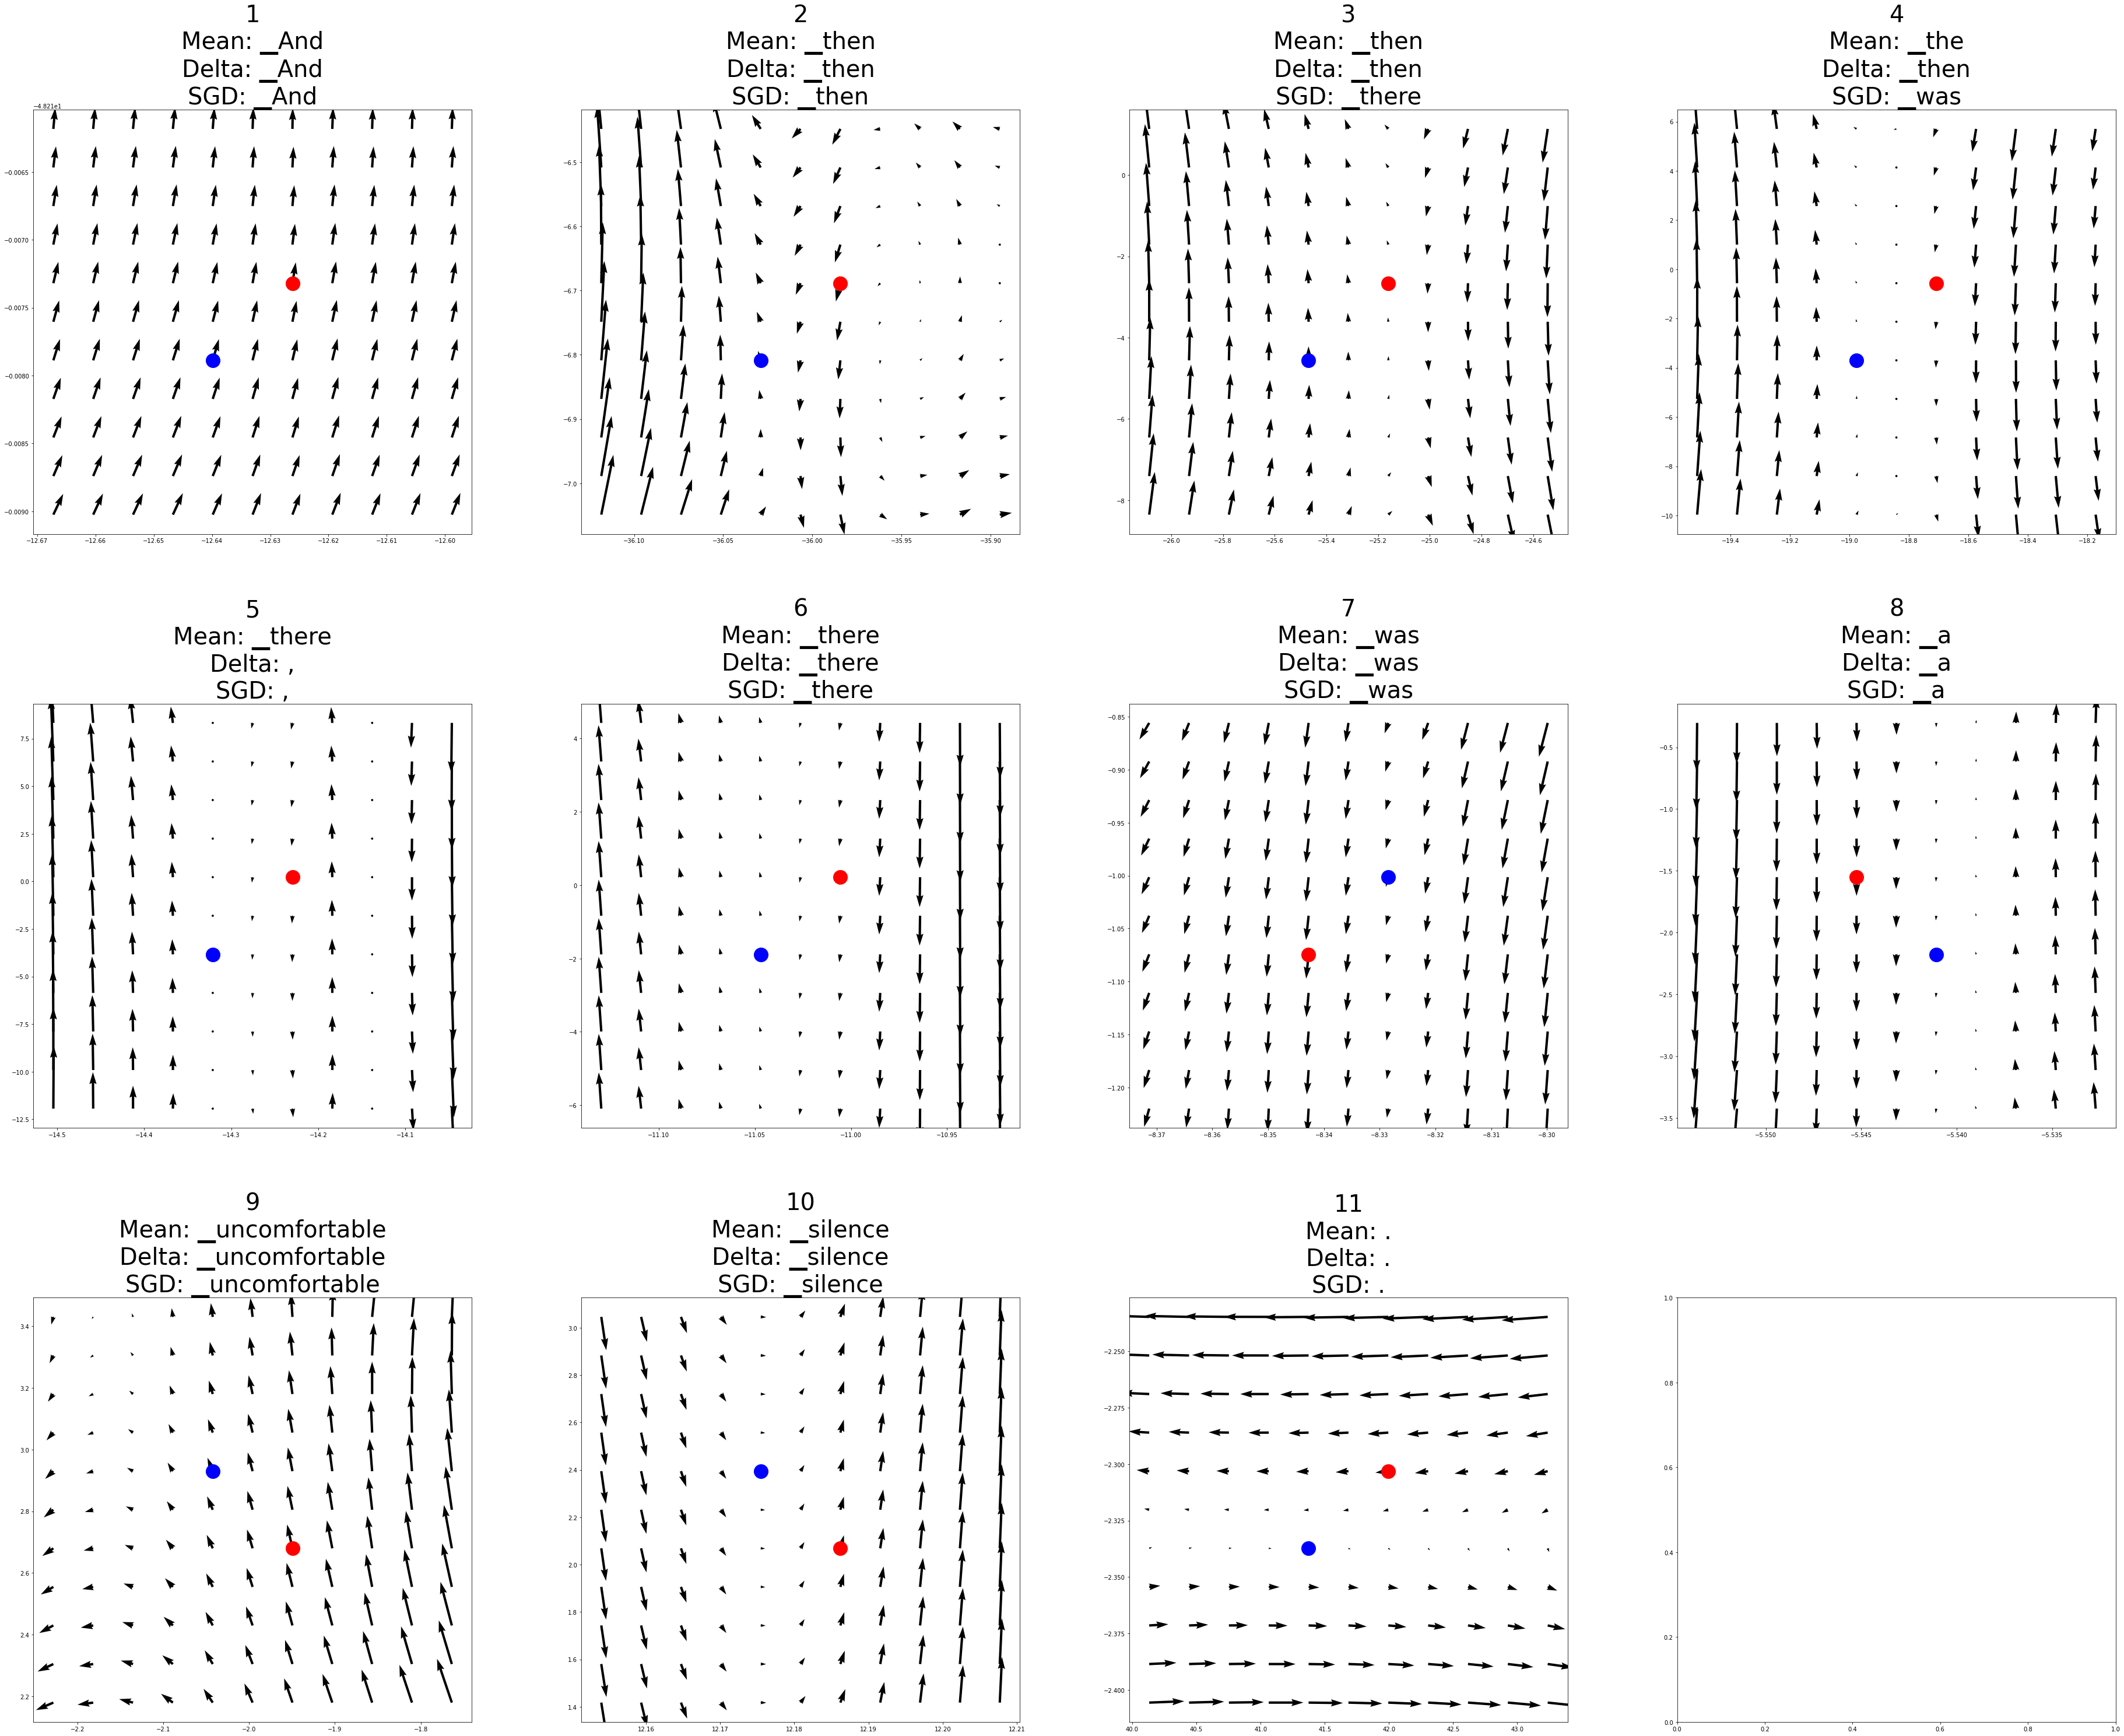

In [186]:
ncols = 4
nfigs = targets_length-2
nrows = int(math.ceil(nfigs / float(ncols)))
figsize = 16
in_grid_plot = 8
out_grid_plot = 0
spacing = 4
fontsize=40
markersize=24

left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.1  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.25  # the amount of width reserved for space between subplots,
              # expressed as a fraction of the average axis width
hspace = 0.40  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
scale=20
quiverdict={"scale":scale}
quiverdict={}

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figsize * ncols, figsize * nrows))
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

for idx in range(targets_length):
    if idx == 0 or idx == targets_length - 1 :
        continue
    X = grid * z_diff_x[idx] + z0[idx, 0]
    Y = grid * z_diff_y[idx] + z0[idx, 1]
    U = all_grads[:, :, idx, 0]
    V = all_grads[:, :, idx, 1]
    X = X[::spacing]
    Y = Y[::spacing]
    U = U[::spacing,::spacing]
    V = V[::spacing,::spacing]
    
    row_idx = (idx-1) // ncols
    col_idx = (idx-1) % ncols

    q = axes[row_idx][col_idx].quiver(X, Y, U, V, **quiverdict)
    x0 = delta_zs[0][0, idx, 0]
    y0 = delta_zs[0][0, idx, 1]
    x4 = delta_zs[4][0, idx, 0]
    y4 = delta_zs[4][0, idx, 1]
    title = "{}\nMean: {}\nDelta: {}\nSGD: {}".format(idx, delta_ys[0][idx], delta_ys[-1][idx], sgd_y[idx])
    axes[row_idx][col_idx].set_title(title, fontsize=fontsize)
    axes[row_idx][col_idx].plot(x0, y0, 'o', color='red', markersize=markersize)
    axes[row_idx][col_idx].plot(x4, y4, 'o', color='blue', markersize=markersize)

print ("SRC\t", src_line.strip())
print ("TRG\t", trg_line.strip())
print ("MEAN\t", " ".join(delta_ys[0][1:-1]))
print ("DELTA\t", " ".join(delta_ys[-1][1:-1]))
print ("SGD\t", " ".join(sgd_y[1:-1]))
print ()
plt.show()